# Project Three Notebook Example

For your final notebook, feel free to duplicate this notebook and edit as needed. 


## Load Some Stuff

This is where we load libraires and the like so we can do what we need. If you get an error saying a module is not loaded, open a new terminal/cmd line and try running: `pip install [module name]`. 

In [110]:
import os
try:
    inputFunc = raw_input
except NameError:
    inputFunc = input

import pandas as pd
from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay
import numpy as np
 
import seaborn as sns
from statsmodels.formula.api import ols

from sklearn import linear_model
from sklearn import metrics

from sklearn.linear_model import LogisticRegression
from patsy import dmatrices

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt

import random



# Custom functions

def evaluate(pred, labels_test):
    acc = accuracy_score(pred, labels_test)
    print ("Accuracey: %s"%acc)
    tn, fp, fn, tp = confusion_matrix(labels_test, pred).ravel()

    recall = tp / (tp + fp)
    percision = tp / (tp + fn)
    f1 = (2 / ((1/recall)+(1/percision)))

    print ("")
    print ("True Negatives: %s"%tn)
    print ("False Positives: %s"%fp)
    print ("False Negatives: %s"%fn)
    print ("True Positives: %s"%tp)
    print ("Recall: %s"%recall)
    print ("Precision: %s"%percision)
    print ("F1 Score: %s"%f1)

def plot_bound(Z_val,data,col1,col2,binary):
    # Z-val equals "Yes" value. E.g., "Y" or "1". 
    # data equals df
    # col1 and col2 defines which colums to use from data
    # Plot binary decision boundary. 
    # For this, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    
    x_min = float(data.iloc[:,[col1]].min())-float(data.iloc[:,[col1]].min())*0.10 
    x_max = float(data.iloc[:,[col1]].max()+float(data.iloc[:,[col1]].min())*0.10)
    y_min = 0.0; 
    y_max = float(training.iloc[:,[col2]].max())+float(training.iloc[:,[col2]].max())*0.10
    h_x = (x_max-x_min)/100  # step size in the mesh
    h_y = (y_max-y_min)/100  # step size in the mesh
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h_x), np.arange(y_min, y_max, h_y))
    if binary == 1:
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])   
        Z = np.where(Z=="Y",1,0)
    else:
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.pcolormesh(xx, yy, Z)
    plt.show()

## Data Cleaning

Here we load the data we collected and get it all ready to feed to our statistical model(s). That is, we are trying to make a table with one **target** column and one or more **features**. Here I'm loading happiness.csv from: https://data.somervillema.gov/Happiness/Somerville-Happiness-Survey-responses-2011-2013-20/w898-3dfm Note: you can find information on the data elements at this link. 


In [111]:
# Load and peek at your data. Change the file name as needed. 
raw_data_df = pd.read_csv('Jail2.csv', parse_dates=[0]) 
raw_data_df.head()

,Sex,Race,Recidivism
0,1,1,1
1,0,1,1
2,1,1,0
3,1,1,1
4,1,1,1


In [112]:
# You can add a columns like so.
raw_data_df["recidivism_Y_N"] = "N"
raw_data_df.head()

,Sex,Race,Recidivism,recidivism_Y_N
0,1,1,1,N
1,0,1,1,N
2,1,1,0,N
3,1,1,1,N
4,1,1,1,N


In [113]:
# And then you can customize these new coulmns using the same method as above. 
raw_data_df.loc[raw_data_df['Recidivism'] == 1, 'recidivism_Y_N'] = "Y"

raw_data_df.head()

,Sex,Race,Recidivism,recidivism_Y_N
0,1,1,1,Y
1,0,1,1,Y
2,1,1,0,N
3,1,1,1,Y
4,1,1,1,Y


In [114]:
# I'm now going to make a set of tables to be used in training some models
# The first set will be for linear regressions where the traget is numeric.
# Happiness
Rec_lin_df = raw_data_df[[
                               'Sex', 
                               'Race', 
                               'Recidivism'
                               ]].copy()
Rec_lin_df.head()

,Sex,Race,Recidivism
0,1,1,1
1,0,1,1
2,1,1,0
3,1,1,1
4,1,1,1


In [116]:
# The second set will be for classifiers where the target is a class.
# Happiness
Rec_class_df = raw_data_df[[
                               'recidivism_Y_N', 
                               'Sex', 
                               'Race'
                               ]].copy()
Rec_class_df.head()

,recidivism_Y_N,Sex,Race
0,Y,1,1
1,Y,0,1
2,N,1,1
3,Y,1,1
4,Y,1,1


## Taining and Validation

Above I created two datasets worth exploring: 
- **`happy_lin_df`**. The data needed to access *happiness* along a continuous variable.
- **`happy_class_df`**. The data needed to access *happiness* as a categorical variable.

Let's take them each in turn. 

## Rec_lin_df



In [117]:
data = Rec_lin_df

data = data[data["Recidivism"]<1]

holdout = data.sample(frac=0.05)
training = data.loc[~data.index.isin(holdout.index)]

AttributeError: 'str' object has no attribute 'conjugate'

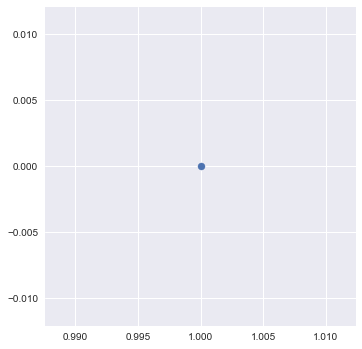

In [118]:
sns.lmplot(x="Sex", y="Recidivism", data=training, x_estimator=np.mean, order=1)

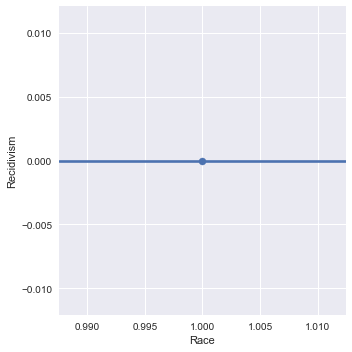

In [119]:
sns.lmplot(x="Race", y="Recidivism", data=training, x_estimator=np.mean, order=1)

In [120]:
model = ols("Recidivism ~ Race + Sex", training).fit()
#model = ols("happy ~ age + income + np.power(age, 2) + np.power(income, 2)", training).fit()
model.summary()

/Users/mtm2482/anaconda/lib/python3.6/site-packages/statsmodels/stats/stattools.py:72: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  "samples were given." % int(n), ValueWarning)
/Users/mtm2482/anaconda/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1386: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/Users/mtm2482/anaconda/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1396: RuntimeWarning: invalid value encountered in double_scalars
  return self.ess/self.df_model
/Users/mtm2482/anaconda/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:660: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
/Users/mtm2482/anaconda/lib/python3.6/site-packages/statsmodels/stats/stattools.py:47: RuntimeWarning: invalid value encountered in double_scalars
  dw = np.sum(diff_resids*

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Recidivism   R-squared:                         nan
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Sun, 03 Dec 2017   Prob (F-statistic):                nan
Time:                        14:52:31   Log-Likelihood:                    inf
No. Observations:                   5   AIC:                              -inf
Df Residuals:                       4   BIC:                              -inf
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept           0          0        nan        nan           0           0
Race                0          0        nan        nan           0           0
==============================================================================
Omnibus:                          nan   Durbin-Watson:                     nan
Prob(Omnibus):                    nan   Jarque-Bera (JB):                1.875
Skew:                           0.000   Prob(JB):                        0.392
Kurtosis:                       0.000   Cond. No.                     2.01e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.47e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [121]:
# Rerun with SciKitLearn because it's easy to check accuracy
features_train = training.drop("Recidivism", axis=1).as_matrix(columns=None)
labels_train = training["Recidivism"].as_matrix(columns=None)

features_test = holdout.drop("Recidivism", axis=1).as_matrix(columns=None)
labels_test = holdout["Recidivism"].as_matrix(columns=None)

lm = linear_model.LinearRegression()
clf = lm.fit(features_train, labels_train)
pred = clf.predict(features_test)
accuracy = metrics.r2_score(labels_test, pred)
print("R squared:",lm.score(features_train,labels_train))
print("Accuracy:",accuracy)

ValueError: Found array with 0 sample(s) (shape=(0, 2)) while a minimum of 1 is required.

## Rec_class_df

Percentage of Ys: 0.9519230769230769



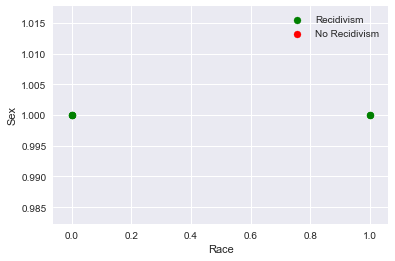

In [122]:
data = Rec_class_df
holdout = data.sample(frac=0.05)
training = data.loc[~data.index.isin(holdout.index)]

# Define the target (y) and feature(s) (X)
features_train = training.drop("recidivism_Y_N", axis=1).as_matrix(columns=None)
labels_train = training["recidivism_Y_N"].as_matrix(columns=None)

features_test = holdout.drop("recidivism_Y_N", axis=1).as_matrix(columns=None)
labels_test = holdout["recidivism_Y_N"].as_matrix(columns=None)

# What percentage of the time is target Y?
print("Percentage of Ys: %s\n"%(len(data[data["recidivism_Y_N"]=="Y"])/len(data)))

#### initial visualization
feature_1_no = [features_test[ii][0] for ii in range(0, len(features_test)) if labels_test[ii]=="N"]
feature_2_no = [features_test[ii][1] for ii in range(0, len(features_test)) if labels_test[ii]=="N"]
feature_1_yes = [features_test[ii][0] for ii in range(0, len(features_test)) if labels_test[ii]=="Y"]
feature_2_yes = [features_test[ii][1] for ii in range(0, len(features_test)) if labels_test[ii]=="Y"]
plt.scatter(feature_1_yes, feature_2_yes, color = "g", label="Recidivism")
plt.scatter(feature_1_no, feature_2_no, color = "r", label="No Recidivism")
plt.legend()
plt.xlabel("Race")
plt.ylabel("Sex")
plt.show()


In [123]:
# Logistic Regression
model = LogisticRegression(fit_intercept = False, C = 1e9)
clf = model.fit(features_train, labels_train)
pred = clf.predict(features_test)
print("Logistic Regression")
evaluate(pred, labels_test)  
plot_bound("Y",holdout,1,2,0)


# Test some spot
x_test = 70
y_test = 160000
print("")
print(clf.predict([[x_test,y_test]])[0])
print(clf.predict_proba([[x_test,y_test]])[0][1])
print("")

from sklearn import tree
clf = tree.DecisionTreeClassifier(min_samples_split=40)
clf = clf.fit(features_train, labels_train)
pred = clf.predict(features_test)
print("\nDecision Tree")
evaluate(pred, labels_test)
plot_bound("Y",holdout,1,2,0)



from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf = clf.fit(features_train, labels_train)
pred = clf.predict(features_test)
print("Random Forest")
evaluate(pred, labels_test)  
plot_bound("Y",holdout,1,2,0)


from sklearn.svm import SVC
clf = SVC(kernel="rbf",probability=True)
clf = clf.fit(features_train, labels_train)
pred = clf.predict(features_test)
print("SVM")
evaluate(pred, labels_test)  
#plot_bound("Y",holdout,1,2,0) # plot doesn't work with SVM

Logistic Regression
Accuracey: 1.0


ValueError: not enough values to unpack (expected 4, got 1)